In [1]:
# %load ds_imp_set.py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=4)
pd.set_option('display.max_columns', None)
sns.set_context(context='notebook')
sns.set_style(style='whitegrid')


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('ames_model.csv')
df.set_index('id', verify_integrity=True, inplace=True)

In [4]:
df.head()

,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,1st_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C,ms_zoning_FV,ms_zoning_I,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,ms_zoning_nan,street_Pave,street_nan,alley_Pave,alley_nan,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,lot_shape_nan,land_contour_HLS,land_contour_Low,land_contour_Lvl,land_contour_nan,utilities_NoSeWa,utilities_NoSewr,utilities_nan,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,lot_config_nan,land_slope_Mod,land_slope_Sev,land_slope_nan,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,neighborhood_nan,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_1_nan,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,condition_2_nan,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,bldg_type_nan,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,house_style_nan,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_style_nan,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,roof_matl_nan,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_1st_nan,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,exterior_2nd_nan,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,mas_vnr_type_nan,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_qual_nan,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,exter_cond_nan,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,foundation_nan,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_qual_nan,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_cond_nan,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_exposure_nan,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_1_nan,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,bsmtfin_type_2_nan,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_nan,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,heating_qc_nan,central_air_Y,central_air_nan,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,electrical_nan,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,kitchen_qual_nan,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,functional_nan,fireplace_qu_Fa,fireplace_qu_Gd,fireplace_qu_Po,fireplace_qu_TA,fireplace_qu_nan,garage_type_Attchd,garage_type_Ba

## Preprocess the data.

In [5]:
features = [col for col in df.columns if col != 'saleprice']
target = 'saleprice'

X = df[features].values
y = df['saleprice'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    )

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Transform the data into its Orthogonal Space.
Following from the conclusions from the feature selection stage,  
use the first 20 principal components in the is model.

In [6]:
pca = PCA(n_components=20)
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

### Fit the Linear Model

In [7]:
lr = LinearRegression()
lr.fit(Z_train, y_train)

y_pred = lr.predict(Z_test)

## Evaluate the Model

In [8]:
print(mean_squared_error(y_test, y_pred)**(0.5)) #RMSE
print(r2_score(y_test, y_pred))

35590.68880884537
0.7816628939634395


## Plot the Residuals

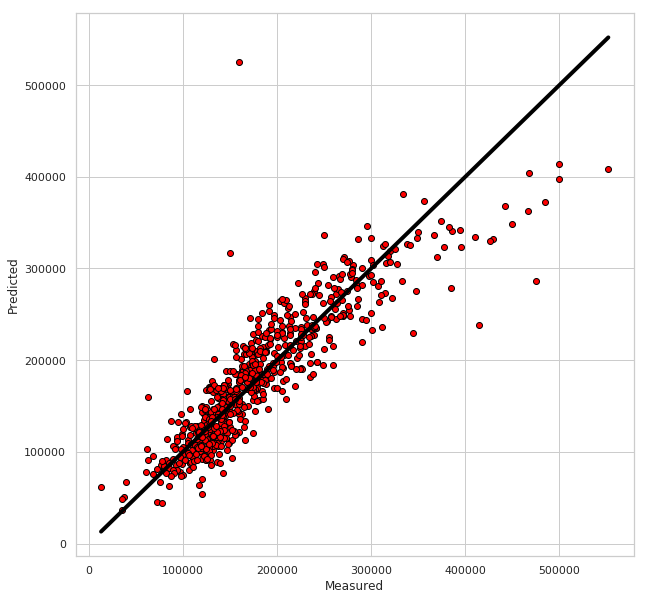

In [9]:
import eval_regress

eval_regress.residual_plot(y_test, y_pred, 10, 10)